# **MACHINE LEARNING**


**1.** Apresentação de um problema real que pode ser resolvido com
modelo supervisionado (2~3 slides contendo o tipo de problema e a
técnica/modelo que resolveria);

    Resposta : A possibilidade de evasão de um aluno de um curso de graduação. 
    Modelo   : Classificação (Regressão  Logística).

**2.** Apresentação de um problema real que pode ser resolvido com
modelo não-supervisionado (2~3 slides contendo o tipo de problema
e a técnica/modelo que resolveria);

    Resposta : Segmentação de carreira de alunos com base em performance em cada área de atuação escolar. 
    Modelo   : Clustering (K-Means).

**3.** Apresentação de um problema real que pode ser resolvido usando ML,
mas não precisa de fato;

    Resposta : Detectar possível hacker em uma rede interna com base no seu comportamento. O mesmo pode ser verificado com base em IPs ou portas acessadas pelo usuário, colocando as condições de identificação ou bloqueio via Firewall.
    Modelo   : Classificação (Regressão  Logística) ou Deep Learning.

**4.** Apresentar um problema implementado (com código), que pode ser:

    a. Um artigo científico que usou algum modelo visto na disciplina
    para resolver um determinado problema. 
    b. Um problema de alguma competição (e.g. Kaggle) que usou
    algum modelo visto na disciplina.
    c. Escolher qualquer problema que o grupo queira (da empresa
    que trabalha, StartupOne) e criar uma aplicação de ML. 

## Modelo de Previsão de Partidas da Copa do Mundo

O objetivo do modelo é prever o resultado de jogos da Copa do Mundo de futebol de 2022 no Quatar.
O intuito do projeto é utilizar os modelos supervisionados de classificação para obter o resultado esperado de cada partida da competição, chegando no possível ganhador.

In [562]:
# Carregamos as principais bibliotecas necessárias
import pandas as pd
import numpy as np

In [563]:
# Realizamos a leitura do dataset
dados = pd.read_csv("jogos.csv")

In [564]:
# Fazemos a descrição dos dados:
dados.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [565]:
dados = dados[[
    "Year",
    "Stage",
    "City",
    "Stadium",
    "Home Team Name",
    "Away Team Name",
    "Home Team Goals",
    "Away Team Goals",
    "Win conditions",
    "Attendance"    
]]
dados.head()




,Year,Stage,City,Stadium,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Win conditions,Attendance
0,1930.0,Group 1,Montevideo,Pocitos,France,Mexico,4.0,1.0,,4444.0
1,1930.0,Group 4,Montevideo,Parque Central,USA,Belgium,3.0,0.0,,18346.0
2,1930.0,Group 2,Montevideo,Parque Central,Yugoslavia,Brazil,2.0,1.0,,24059.0
3,1930.0,Group 3,Montevideo,Pocitos,Romania,Peru,3.0,1.0,,2549.0
4,1930.0,Group 1,Montevideo,Parque Central,Argentina,France,1.0,0.0,,23409.0


In [566]:
# Nomear as colunas

dados.columns = [
    "year",
    "stage",
    "city",
    "stadium",
    "home_team",
    "away_team",
    "home_score",
    "away_score",
    "conditions",
    "attendance"
]

dados.head()

,year,stage,city,stadium,home_team,away_team,home_score,away_score,conditions,attendance
0,1930.0,Group 1,Montevideo,Pocitos,France,Mexico,4.0,1.0,,4444.0
1,1930.0,Group 4,Montevideo,Parque Central,USA,Belgium,3.0,0.0,,18346.0
2,1930.0,Group 2,Montevideo,Parque Central,Yugoslavia,Brazil,2.0,1.0,,24059.0
3,1930.0,Group 3,Montevideo,Pocitos,Romania,Peru,3.0,1.0,,2549.0
4,1930.0,Group 1,Montevideo,Parque Central,Argentina,France,1.0,0.0,,23409.0


In [567]:
# verificamos os tipos de dados
# verificamos se temos dados vazios que precisam ser tratados

dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        852 non-null    float64
 1   stage       852 non-null    object 
 2   city        852 non-null    object 
 3   stadium     852 non-null    object 
 4   home_team   852 non-null    object 
 5   away_team   852 non-null    object 
 6   home_score  852 non-null    float64
 7   away_score  852 non-null    float64
 8   conditions  852 non-null    object 
 9   attendance  850 non-null    float64
dtypes: float64(4), object(6)
memory usage: 357.3+ KB


In [568]:
# Removemos os NAs presentes
dados = dados.dropna()



In [569]:
# Vamos Verificar o campo conditions

dados["conditions"].unique()

array([' ', 'Austria win after extra time ',
       'Italy win after extra time ', 'Brazil win after extra time ',
       'Czechoslovakia win after extra time ',
       'Hungary win after extra time ',
       'Northern Ireland win after extra time ',
       'England win after extra time ',
       'Germany FR win after extra time ',
       'Uruguay win after extra time ', 'Argentina win after extra time ',
       ' win on penalties (5 - 4) ', 'Belgium win after extra time ',
       'France win on penalties (3 - 4) ',
       'Germany FR win on penalties (4 - 1) ',
       'Belgium win on penalties (4 - 5) ',
       'France win after extra time ', 'Cameroon win after extra time ',
       'Republic of Ireland win on penalties (5 - 4) ',
       'Yugoslavia win after extra time ', ' win on penalties (2 - 3) ',
       ' win on penalties (3 - 4) ', ' win on penalties (4 - 3) ',
       'Bulgaria win on penalties (1 - 3) ',
       'Sweden win on penalties (4 - 5) ',
       'Brazil win on penaltie

In [570]:
# Verifiquei que essa coluna informa quem ganhou no caso de empate,
# vou verificar os preenchidos

dados.query("conditions.str.strip() != ''")


,year,stage,city,stadium,home_team,away_team,home_score,away_score,conditions,attendance
18,1934.0,Preliminary round,Turin,Stadio Benito Mussolini,Austria,France,3.0,2.0,Austria win after extra time,16000.0
34,1934.0,Final,Rome,Nazionale PNF,Italy,Czechoslovakia,2.0,1.0,Italy win after extra time,55000.0
39,1938.0,First round,Marseilles,Stade V�lodrome,Italy,Norway,2.0,1.0,Italy win after extra time,19000.0
40,1938.0,First round,Strasbourg,Stade de la Meinau,Brazil,Poland,6.0,5.0,Brazil win after extra time,13452.0
41,1938.0,First round,Le Havre,Cavee Verte,Czechoslovakia,Netherlands,3.0,0.0,Czechoslovakia win after extra time,11000.0
...,...,...,...,...,...,...,...,...,...,...
842,2014.0,Round of 16,Sao Paulo,Arena de Sao Paulo,Argentina,Switzerland,1.0,0.0,Argentina win after extra time,63255.0
843,2014.0,Round of 16,Salvador,Arena Fonte Nova,Belgium,USA,2.0,1.0,Belgium win after extra time,51227.0
847,2014.0,Quarter-finals,Salvador,Arena Fonte Nova,Netherlands,Costa Rica,0.0,0.0,Netherlands win on penalties (4 - 3),51179.0
849,2014.0,Semi-finals,Sao Paulo,Arena de Sao Paulo,Netherlands,Argentina,0.0,0.0,Argentina win on penalties (2 - 4),63267.0


In [571]:
# vou verificar se nos casos de empate, todos há quem ganhou.

dados.query("home_score == away_score")

# Não são todos, vou tentar inicialmente não utilizar 

,year,stage,city,stadium,home_team,away_team,home_score,away_score,conditions,attendance
28,1934.0,Quarter-finals,Florence,Giovanni Berta,Italy,Spain,1.0,1.0,,35000.0
35,1938.0,First round,Paris,Parc des Princes,Switzerland,Germany,1.0,1.0,,27152.0
38,1938.0,First round,Toulouse,Stade Municipal,Cuba,Romania,3.0,3.0,,7000.0
44,1938.0,Quarter-finals,Bordeaux,Stade du Parc Lescure,Brazil,Czechoslovakia,1.0,1.0,,22021.0
58,1950.0,Group 1,Sao Paulo,Pacaembu,Brazil,Switzerland,2.0,2.0,,42032.0
...,...,...,...,...,...,...,...,...,...,...
833,2014.0,Round of 16,Recife,Arena Pernambuco,Costa Rica,Greece,1.0,1.0,Costa Rica win on penalties (5 - 3),41242.0
836,2014.0,Round of 16,Belo Horizonte,Estadio Mineirao,Brazil,Chile,1.0,1.0,Brazil win on penalties (3 - 2),57714.0
839,2014.0,Round of 16,Recife,Arena Pernambuco,Costa Rica,Greece,1.0,1.0,Costa Rica win on penalties (5 - 3),41242.0
847,2014.0,Quarter-finals,Salvador,Arena Fonte Nova,Netherlands,Costa Rica,0.0,0.0,Netherlands win on penalties (4 - 3),51179.0


In [572]:
# Criamos uma coluna para mencionar o vencedor da partida

def classificar_vencedor(x):     
    if x["home_score"] == x["away_score"]:
        x["winner_home"] = 2
    else:
        if x["home_score"] > x["away_score"]:
            x["winner_home"] = 1
        else:
            x["winner_home"] = 0
    return x


dados = dados.apply(lambda x: classificar_vencedor(x),axis=1)

# inverter o home e away

def inverter_dados(x): 
    old_home_score = x["home_score"]
    old_home_name = x["home_team"]

    x["home_score"] = x["away_score"]
    x["home_team"] = x["away_team"]

    x["away_team"] = old_home_name
    x["away_score"] = old_home_score
    
    if x["home_score"] == x["away_score"]:
        x["winner_home"] = 2
    else:
        if x["home_score"] > x["away_score"]:
            x["winner_home"] = 1
        else:
            x["winner_home"] = 0
    return x


# Vou duplicar o dataset mas com home e way invertidos, pra assim ter mais parâmetros na predição
dados_invertidos = dados.apply(lambda x: inverter_dados(x),axis=1)

dados = dados.append(dados_invertidos)

def classificar_vencedor_conditions(x): 
    if x["winner_home"] == 2:
        if  x["conditions"].find(x["home_team"]) == 0:
            x["winner_home"] = 1
        else:
            x["winner_home"] = 0
    return x

# Se houve empate eu tento encontrar o vencedor na conditions e preencher, se não conto como derrota
dados = dados.apply(lambda x: classificar_vencedor_conditions(x),axis=1)





C:\Users\gabri\AppData\Local\Temp\ipykernel_23380\3446298792.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append(dados_invertidos)


In [573]:
# verificar se alterou corretamente o home_winner quando foi marcado como 0
dados.query("home_score == away_score and winner_home == 0")


,year,stage,city,stadium,home_team,away_team,home_score,away_score,conditions,attendance,winner_home
28,1934.0,Quarter-finals,Florence,Giovanni Berta,Italy,Spain,1.0,1.0,,35000.0,0
35,1938.0,First round,Paris,Parc des Princes,Switzerland,Germany,1.0,1.0,,27152.0,0
38,1938.0,First round,Toulouse,Stade Municipal,Cuba,Romania,3.0,3.0,,7000.0,0
44,1938.0,Quarter-finals,Bordeaux,Stade du Parc Lescure,Brazil,Czechoslovakia,1.0,1.0,,22021.0,0
58,1950.0,Group 1,Sao Paulo,Pacaembu,Brazil,Switzerland,2.0,2.0,,42032.0,0
...,...,...,...,...,...,...,...,...,...,...,...
830,2014.0,Quarter-finals,Salvador,Arena Fonte Nova,Costa Rica,Netherlands,0.0,0.0,Netherlands win on penalties (4 - 3),51179.0,0
833,2014.0,Round of 16,Recife,Arena Pernambuco,Greece,Costa Rica,1.0,1.0,Costa Rica win on penalties (5 - 3),41242.0,0
836,2014.0,Round of 16,Belo Horizonte,Estadio Mineirao,Chile,Brazil,1.0,1.0,Brazil win on penalties (3 - 2),57714.0,0
839,2014.0,Round of 16,Recife,Arena Pernambuco,Greece,Costa Rica,1.0,1.0,Costa Rica win on penalties (5 - 3),41242.0,0


In [574]:
# verificar se alterou corretamente o home_winner quando foi marcado como 1
dados.query("home_score == away_score and winner_home == 1")

,year,stage,city,stadium,home_team,away_team,home_score,away_score,conditions,attendance,winner_home
405,1986.0,Quarter-finals,Monterrey,Estadio Universitario,Germany FR,Mexico,0.0,0.0,Germany FR win on penalties (4 - 1),41700.0,1
515,1994.0,Final,Los Angeles,Rose Bowl,Brazil,Italy,0.0,0.0,Brazil win on penalties (3 - 2),94194.0,1
571,1998.0,Round of 16,Saint-Etienne,Stade Geoffroy Guichard,Argentina,England,2.0,2.0,Argentina win on penalties (4 - 3),30600.0,1
576,1998.0,Semi-finals,Marseilles,Stade V�lodrome,Brazil,Netherlands,1.0,1.0,Brazil win on penalties (4 - 2),54000.0,1
630,2002.0,Round of 16,Suwon,Suwon World Cup Stadium,Spain,"rn"">Republic of Ireland",1.0,1.0,Spain win on penalties (3 - 2),38926.0,1
700,2006.0,Quarter-finals,Berlin,Olympiastadion,Germany,Argentina,1.0,1.0,Germany win on penalties (4 - 2),72000.0,1
707,2006.0,Final,Berlin,Olympiastadion,Italy,France,1.0,1.0,Italy win on penalties (5 - 3),69000.0,1
762,2010.0,Round of 16,Tshwane/Pretoria,Loftus Versfeld Stadium,Paraguay,Japan,0.0,0.0,Paraguay win on penalties (5 - 3),36742.0,1
765,2010.0,Quarter-finals,Johannesburg,Soccer City Stadium,Uruguay,Ghana,1.0,1.0,Uruguay win on penalties (4 - 2),84017.0,1
820,2014.0,Round of 16,Belo Horizonte,Estadio Mineirao,Brazil,Chile,1.0,1.0,Brazil win on penalties (3 - 2),57714.0,1


In [575]:
# Mudamos os valores de cada coluna categorica para o tipo category, para futuramente transformá-los em números
dados["home_team"]  = dados["home_team"].astype('category')
dados["away_team"]  = dados["away_team"].astype('category')
dados["stadium"] = dados["stadium"].astype('category')
dados["city"]       = dados["city"].astype('category')
dados["stage"]    = dados["stage"].astype('category')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 851
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         1700 non-null   float64 
 1   stage        1700 non-null   category
 2   city         1700 non-null   category
 3   stadium      1700 non-null   category
 4   home_team    1700 non-null   category
 5   away_team    1700 non-null   category
 6   home_score   1700 non-null   float64 
 7   away_score   1700 non-null   float64 
 8   conditions   1700 non-null   object  
 9   attendance   1700 non-null   float64 
 10  winner_home  1700 non-null   int64   
dtypes: category(5), float64(4), int64(1), object(1)
memory usage: 121.5+ KB


In [576]:
# Convertemos as colunas categoricas para inteiros
#dados = dados.query("year >= 2000")
dados["home_team"] = dados["home_team"].cat.codes
dados["away_team"] = dados["away_team"].cat.codes
dados["stadium"] = dados["stadium"].cat.codes
dados["city"] = dados["city"].cat.codes
dados["stage"] = dados["stage"].cat.codes
dados.head()

,year,stage,city,stadium,home_team,away_team,home_score,away_score,conditions,attendance,winner_home
0,1930.0,2,83,124,26,45,4.0,1.0,,4444.0,1
1,1930.0,5,83,122,72,5,3.0,0.0,,18346.0,1
2,1930.0,3,83,122,76,7,2.0,1.0,,24059.0,1
3,1930.0,4,83,124,56,53,3.0,1.0,,2549.0,1
4,1930.0,2,83,122,2,26,1.0,0.0,,23409.0,1


In [577]:
# Remover a coluna conditions

dados.drop(["conditions"], axis=1,inplace=True)

# Normalizar os dados 
from sklearn import preprocessing

dados["home_team"] = dados["home_team"] / dados["home_team"].max()  
dados["away_team"] = dados["away_team"] / dados["away_team"].max()  
dados["stadium"] = dados["stadium"] / dados["stadium"].max()  
dados["city"] = dados["city"] / dados["city"].max()  
dados["stage"] = dados["stage"] / dados["stage"].max()  
dados["year"] = dados["year"] / dados["year"].max()  

dados.head()

,year,stage,city,stadium,home_team,away_team,home_score,away_score,attendance,winner_home
0,0.958292,0.090909,0.553333,0.688889,0.317073,0.548780,4.0,1.0,4444.0,1
1,0.958292,0.227273,0.553333,0.677778,0.878049,0.060976,3.0,0.0,18346.0,1
2,0.958292,0.136364,0.553333,0.677778,0.926829,0.085366,2.0,1.0,24059.0,1
3,0.958292,0.181818,0.553333,0.688889,0.682927,0.646341,3.0,1.0,2549.0,1
4,0.958292,0.090909,0.553333,0.677778,0.024390,0.317073,1.0,0.0,23409.0,1


C:\Users\gabri\AppData\Local\Temp\ipykernel_23380\2964332415.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.figure(figsize=(20,20),dpi=300).show()


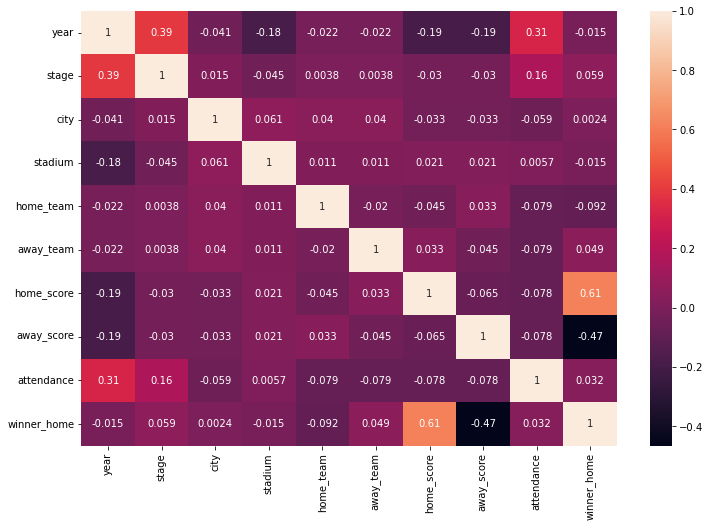

<Figure size 6000x6000 with 0 Axes>

In [578]:
# Verificar correlação 

import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

corr_matrix = dados.corr()
sn.heatmap(corr_matrix, annot=True)
figure_size = plt.gcf().get_size_inches()
factor = 2
plt.gcf().set_size_inches(factor * figure_size)
plt.figure(figsize=(20,20),dpi=300).show()


In [579]:
# remover váriaveis com corelações fracas demais 


dados.drop(["year"], axis=1,inplace=True)
dados.drop(["city"], axis=1,inplace=True)
dados.drop(["stadium"], axis=1,inplace=True)
dados.drop(["attendance"], axis=1,inplace=True)
#dados.drop(["stage"], axis=1,inplace=True)
# Verificar se está tudo correto
dados.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 851
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stage        1700 non-null   float64
 1   home_team    1700 non-null   float64
 2   away_team    1700 non-null   float64
 3   home_score   1700 non-null   float64
 4   away_score   1700 non-null   float64
 5   winner_home  1700 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.0 KB


In [580]:
# Vamos separar a base em duas partes, uma de treino e outra de teste
from sklearn.model_selection import train_test_split

X = dados.drop(["home_score","away_score","winner_home"], axis=1)
y = dados[["winner_home"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y

,winner_home
0,1
1,1
2,1
3,1
4,1
...,...
847,0
848,1
849,1
850,1


In [504]:

# Criar o modelo de regresão 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(multi_class='multinomial',penalty='none')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Accuracy Score:', acc_log)


Accuracy Score: 60.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
